In [186]:
import numpy as np
import  matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model
import sklearn.model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn import metrics
import itertools as it
from sklearn.metrics import f1_score 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree
%matplotlib inline

# Parte 1

In [187]:
hitters = pd.read_csv('Hitters.csv')
hitters = hitters.dropna(subset = ['Salary'])
hitters['logSalary'] = np.log(hitters.Salary)
test, train = train_test_split(hitters,test_size = 0.50)

In [188]:
x_features = ['Hits','HmRun','Runs','RBI','Walks','Years','PutOuts','Assists','Errors']
x_train = train[x_features]
x_test = test[x_features]
y_train = train.logSalary
y_test = test.logSalary

In [189]:
alphas = np.linspace(2,10,9)
CV_train = np.ones(len(alphas))
CV_val = np.ones(len(alphas))
CV_test = np.ones(len(alphas))

std_train = np.ones(len(alphas))
std_val = np.ones(len(alphas))
std_test = np.ones(len(alphas))

for alpha in range(len(alphas)):    
    rtd = DecisionTreeRegressor(max_depth = int(alphas[alpha]))
    #cross validation 
    
    k = 6

    MSE_train = np.ones(k)
    MSE_val = np.ones(k)
    MSE_test = np.ones(k)
    e_train = 0
    e_val = 0
    e_test = 0

    for itera in range(k):
        
        x = np.array(x_train)
        y = np.array(y_train)   
        kx = np.array_split(x,k)
        ky = np.array_split(y,k)
        xout = kx.pop(itera)
        yout = ky.pop(itera)
        rtd = rtd.fit(np.concatenate(kx),np.concatenate(ky))

        predict_train = rtd.predict(np.concatenate(kx))
        predict_val = rtd.predict(xout)
        predict_test = rtd.predict(x_test)
        
        e_train = (np.concatenate(ky) - predict_train)**2
        e_val = (yout - predict_val)**2
        e_test = (y_test - predict_test)**2
        
        MSE_train[itera] = np.sum(e_train)/len(np.concatenate(ky))
        MSE_val[itera] = np.sum(e_val)/len(yout)
        MSE_test[itera] = np.sum(e_test)/len(y_test)
 
        
    CV_train[alpha] = np.sum(MSE_train)/k
    CV_val[alpha] = np.sum(MSE_val)/k
    CV_test[alpha] = np.sum(MSE_test)/k 
    std_train[alpha] = np.std(e_train)
    std_val[alpha] = np.std(e_val)
    std_test[alpha] = np.std(e_test)
    
    

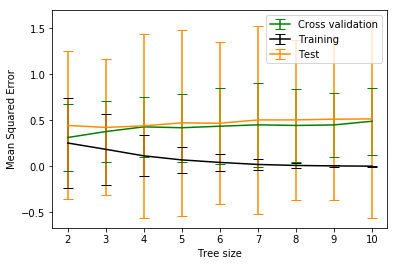

In [199]:
plt.errorbar(alphas,CV_val, yerr = std_val,label = 'Cross validation', c= 'green',capsize=5) 
plt.errorbar(alphas,CV_train, yerr = std_train,c = 'black', label = 'Training',capsize=5)
plt.errorbar(alphas,CV_test, yerr = std_test,c = 'darkorange', label = 'Test',capsize=5)
plt.xlabel('Tree size')
plt.ylabel('Mean Squared Error')
plt.legend()

In [211]:
from sklearn.tree import DecisionTreeClassifier

In [209]:
cleveland = pd.read_csv('processed.cleveland.data',header=None)
labels = ['age','sex','cp','trestbps','chol','fbs ','restecg', 'thalach','exang','oldpeak', 'slope', 'ca', 'thal', 'num' ]
cleveland.columns = labels
test, train = train_test_split(cleveland,test_size = 0.50)

In [210]:
x_features = ['age','sex','cp','trestbps','chol','fbs ','restecg', 'thalach','exang','oldpeak', 'slope', 'ca', 'thal']
x_train = train[x_features]
x_test = test[x_features]
y_train = train.num
y_test = test.num

In [212]:
alphas = np.linspace(2,10,9)
CV_train = np.ones(len(alphas))
CV_val = np.ones(len(alphas))
CV_test = np.ones(len(alphas))

std_train = np.ones(len(alphas))
std_val = np.ones(len(alphas))
std_test = np.ones(len(alphas))

for alpha in range(len(alphas)):    
    dtc = DecisionTreeClassifier(max_depth = int(alphas[alpha]))
    #k-fold
    
    k = 6

    MSE_train = np.ones(k)
    MSE_val = np.ones(k)
    MSE_test = np.ones(k)
    e_train = 0
    e_val = 0
    e_test = 0

    for itera in range(k):
        
        x = np.array(x_train)
        y = np.array(y_train)   
        kx = np.array_split(x,k)
        ky = np.array_split(y,k)
        xout = kx.pop(itera)
        yout = ky.pop(itera)
        rtd = rtd.fit(np.concatenate(kx),np.concatenate(ky))

        predict_train = rtd.predict(np.concatenate(kx))
        predict_val = rtd.predict(xout)
        predict_test = rtd.predict(x_test)
        
        #Gini index
        
        e_train = (np.concatenate(ky) - predict_train)**2
        e_val = (yout - predict_val)**2
        e_test = (y_test - predict_test)**2
        
        MSE_train[itera] = np.sum(e_train)/len(np.concatenate(ky))
        MSE_val[itera] = np.sum(e_val)/len(yout)
        MSE_test[itera] = np.sum(e_test)/len(y_test)
 
        
    CV_train[alpha] = np.sum(MSE_train)/k
    CV_val[alpha] = np.sum(MSE_val)/k
    CV_test[alpha] = np.sum(MSE_test)/k 
    std_train[alpha] = np.std(e_train)
    std_val[alpha] = np.std(e_val)
    std_test[alpha] = np.std(e_test)
    
    

ValueError: could not convert string to float: '?'

In [ ]:
plt.errorbar(alphas,CV_val, yerr = std_val,label = 'Cross validation', c= 'green',capsize=5) 
plt.errorbar(alphas,CV_train, yerr = std_train,c = 'black', label = 'Training',capsize=5)
plt.errorbar(alphas,CV_test, yerr = std_test,c = 'darkorange', label = 'Test',capsize=5)
plt.xlabel('Tree size')
plt.ylabel('Error')
plt.legend()

# Parte 2

In [231]:
oj = pd.read_csv('OJ.csv')
oj['purchaseNum'] = list(map(lambda x : 1 if x=="CH" else 0 , oj.Purchase))
test, train = train_test_split(oj,test_size = 0.50)
x_features = ['WeekofPurchase','StoreID','PriceCH','PriceMM','DiscCH','DiscMM','SpecialCH','SpecialMM','LoyalCH',
              'SalePriceMM','SalePriceCH','PriceDiff', 'PctDiscMM','PctDiscCH','ListPriceDiff','STORE']
x_train = train[x_features]
y_train = train.purchaseNum
x_test = train[x_features]
y_test = train.purchaseNum
#target: CH, purchase =1. MM, purchase =0

In [250]:
alphas = np.linspace(2,10,9)
CV_train = np.ones(len(alphas))
CV_val = np.ones(len(alphas))
CV_test = np.ones(len(alphas))

std_train = np.ones(len(alphas))
std_val = np.ones(len(alphas))
std_test = np.ones(len(alphas))

for alpha in range(len(alphas)):    
    dtc = DecisionTreeClassifier(max_depth = int(alphas[alpha]))
    #k-fold
    
    k = 6

    MSE_train = np.ones(k)
    MSE_val = np.ones(k)
    MSE_test = np.ones(k)
    e_train = 0
    e_val = 0
    e_test = 0

    for itera in range(k):
        
        x = np.array(x_train)
        y = np.array(y_train)   
        kx = np.array_split(x,k)
        ky = np.array_split(y,k)
        xout = kx.pop(itera)
        yout = ky.pop(itera)
        rtd = rtd.fit(np.concatenate(kx),np.concatenate(ky))

        predict_train = rtd.predict(np.concatenate(kx))
        predict_val = rtd.predict(xout)
        predict_test = rtd.predict(x_test)
        
        #Gini index
        
        e_train = (np.concatenate(ky) - predict_train)**2
        e_val = (yout - predict_val)**2
        e_test = (y_test - predict_test)**2
        
        MSE_train[itera] = np.sum(e_train)/len(np.concatenate(ky))
        MSE_val[itera] = np.sum(e_val)/len(yout)
        MSE_test[itera] = np.sum(e_test)/len(y_test)
 
        
    CV_train[alpha] = np.sum(MSE_train)/k
    CV_val[alpha] = np.sum(MSE_val)/k
    CV_test[alpha] = np.sum(MSE_test)/k 
    std_train[alpha] = np.std(e_train)
    std_val[alpha] = np.std(e_val)
    std_test[alpha] = np.std(e_test) 

In [ ]:
plt.plot(precision_lr, recall_lr, label = 'LR')
plt.plot(precision_lda, recall_lda, label = 'LDA')
plt.legend()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Recall-precision curve')